# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.639156e+01     1.386705e+01
 * time: 0.0018260478973388672
     1     3.017753e+01     4.738931e+00
 * time: 0.0074138641357421875
     2     2.617187e+01     3.549365e+00
 * time: 0.012887001037597656
     3     2.460709e+01     3.717846e+00
 * time: 0.017187833786010742
     4     2.454756e+01     7.457110e+00
 * time: 0.021537065505981445
     5     2.177755e+01     4.274986e+00
 * time: 0.026011943817138672
     6     2.109428e+01     5.318754e+00
 * time: 0.06017184257507324
     7     2.031453e+01     4.102467e+00
 * time: 0.0652618408203125
     8     1.957157e+01     2.437162e+00
 * time: 0.06924104690551758
     9     1.878608e+01     2.085199e+00
 * time: 0.07331395149230957
    10     1.827633e+01     1.496412e+00
 * time: 0.07732892036437988
    11     1.801014e+01     9.341943e-01
 * time: 0.08124303817749023
    12     1.794398e+01     1.252226e+00
 * time: 0.08471202850341797
    13     1.785288e+01     8.068512e-01
 

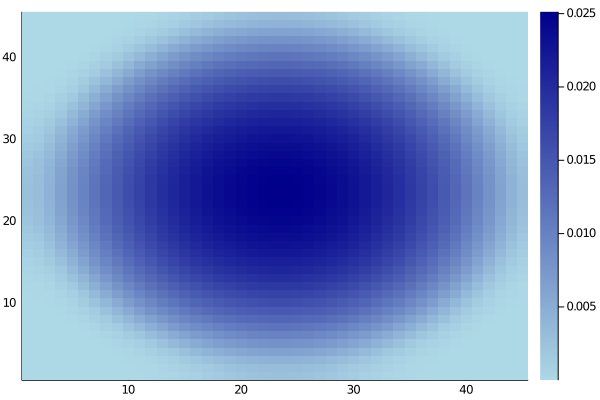

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)